# Лабораторная работа 5

Решение задачи регрессии.

Есть файл web_traffic.tsv, который представляет статистику посещений веб-сервера компании и нашей задачей является предсказание значения посещения, для того, чтобы выделить в нужный момент времени дополнительную мощность сервера и не допустить его перегрузки.

Слева находится индекс или номер часа по порядку, в который производился замер посещаемости, а справа - количество запросов сайта за этот час.

In [1]:
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [13]:
data = pd.read_csv('web_traffic.tsv',delimiter='\t',names=["hour", "requests"])

# dropna() - удаляет значения NaN
data = data.dropna()
target_var_name = 'requests'


hours_data = data['hour']
requests_data = data[target_var_name]

import numpy as np
from numpy import isnan

requests_data.head()

0    2272.0
2    1386.0
3    1365.0
4    1488.0
5    1337.0
Name: requests, dtype: float64

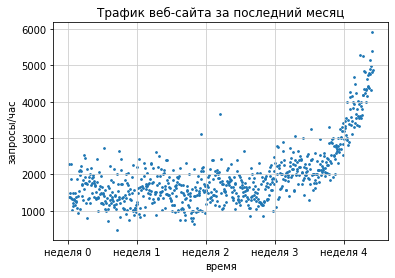

In [14]:
plt.scatter(hours_data, requests_data, s=3)
plt.title('Трафик веб-сайта за последний месяц')

plt.xlabel('время')
plt.ylabel('запросы/час')

plt.xticks([w*7*24 for w in range(10)],["неделя %i" %w for w in range(10)])
plt.autoscale(tight=False)

plt.grid(True, linestyle='-', color='0.8')
plt.show()

In [15]:
def error(f,x,y):
    return np.sum((f(x)-y)**2)

In [16]:
# два предположения по поводу тренда: 

# 1 - предполагаем один тренд линейный или степенной тренд
# 2 - не один тренд, а два - линейных или один линейный, а второй - степенной
# где-то по границе 3.5 недели

f1p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 1, full=True)
print("Параметры модели {}".format(f1p))

Параметры модели [  2.59619213 989.02487106]


In [17]:
f1 = np.poly1d(f1p)
print(f"{error(f1, hours_data, requests_data):.5}")

3.1739e+08


Таким образом, наша модель будет выглядеть следующим образом:
```
    f(x) = 2.59619213 * x + 989.02487106
```
MSE = 3.1739e+08

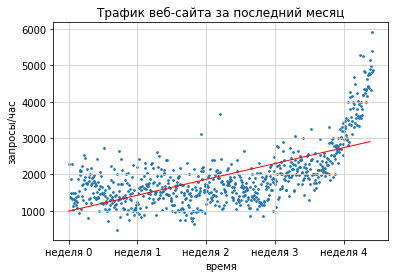

In [18]:
plt.title('Трафик веб-сайта за последний месяц')
plt.xlabel('время')
plt.ylabel('запросы/час')
plt.xticks([w*7*24 for w in range(10)],["неделя %i" %w for w in range(10)])
plt.autoscale(tight=False)
plt.grid(True, linestyle='-', color='0.8')

# визуализация данных
plt.scatter(hours_data, requests_data, s=3)

# отобразим модель #1 
f1x = np.linspace(0, hours_data[len(hours_data)], len(hours_data))
f1y = f1(f1x)
plt.plot(f1x, f1y, linewidth=1.0, color='red')

plt.show()

## Самостоятельная работа (~ 20 минут)

1. Реализовать модели степени полинома 2, 3, 5, 10, 20
2. Посчитать для каждой из них метрику ошибки MSE и дать характеристику того, что получилось.
3. Визуализировать каждую модель на графике так, чтобы это было отображено на одной координатной плоскости.


В дискорде в личном сообщении написать в качестве ответа следующее: 

1. Параметры модели (вектор чисел) x5 (для каждой модели)
2. Метрику MSE (x5) для каждой модели.
3. Скриншот с графиками: 7 графиков (scatterplot (done), линия для степени полинома 1 (done), график для степени полинома 2, 3, 5, 10, 20)

Цвета для графиков степеней полинома: 
- 1 - black
- 2 - blue
- 3 - lime
- 5 - magenta
- 10 - cyan
- 20 - red

In [19]:
# создание моделей степени полинома 2, 3, ... 20
f2p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 2, full=True)
f2 = np.poly1d(f2p)
print("Параметры модели 2 (степень полинома 2) {}".format(f2p))
print(f"MSE = {error(f2, hours_data, requests_data):.5}")

f3p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 3, full=True)
f3 = np.poly1d(f3p)
print("Параметры модели 3 (степень полинома 3) {}".format(f3p))
print(f"MSE = {error(f3, hours_data, requests_data):.5}")

f5p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 5, full=True)
f5 = np.poly1d(f5p)
print("Параметры модели 5 (степень полинома 5) {}".format(f5p))
print(f"MSE = {error(f5, hours_data, requests_data):.5}")

f10p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 10, full=True)
f10 = np.poly1d(f10p)
print("Параметры модели 10 (степень полинома 10) {}".format(f10p))
print(f"MSE = {error(f10, hours_data, requests_data):.5}")

f20p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 20, full=True)
f20 = np.poly1d(f20p)
print("Параметры модели 20 (степень полинома 20) {}".format(f20p))
print(f"MSE = {error(f20, hours_data, requests_data):.5}")

Параметры модели 2 (степень полинома 2) [ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]
MSE = 1.7998e+08
Параметры модели 3 (степень полинома 3) [ 3.04960132e-05 -2.35893797e-02  4.94226019e+00  1.33328797e+03]
MSE = 1.3935e+08
Параметры модели 5 (степень полинома 5) [ 2.16470951e-10 -3.13405153e-07  1.63844797e-04 -3.41497485e-02
  2.24785575e+00  1.53616050e+03]
MSE = 1.2446e+08
Параметры модели 10 (степень полинома 10) [-3.73981968e-22  1.36473756e-18 -2.14294406e-15  1.89884971e-12
 -1.04570108e-09  3.70867731e-07 -8.45604588e-05  1.19167041e-02
 -9.41618606e-01  3.33703840e+01  1.26421204e+03]
MSE = 1.2194e+08
Параметры модели 20 (степень полинома 20) [ 4.83090666e-47 -3.18254288e-43  8.87216773e-40 -1.31484635e-36
  9.87793047e-34 -8.55503070e-32 -5.09644269e-28  3.80311873e-25
  4.98732305e-23 -2.74831025e-19  2.35473549e-16 -1.17298303e-13
  3.93132320e-11 -9.23453278e-09  1.52942330e-06 -1.76098283e-04
  1.36396780e-02 -6.69561733e-01  1.86541701e+01 -2.35174285e+02
  2.3382

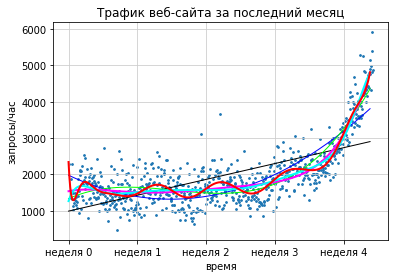

In [20]:
plt.title('Трафик веб-сайта за последний месяц')
plt.xlabel('время')
plt.ylabel('запросы/час')
plt.xticks([w*7*24 for w in range(10)],["неделя %i" %w for w in range(10)])
plt.autoscale(tight=False)
plt.grid(True, linestyle='-', color='0.8')

# визуализация данных
plt.scatter(hours_data, requests_data, s=3)

# отобразим модель #1 (степень полинома 1)
fx = np.linspace(0, hours_data[len(hours_data)], len(hours_data))
f1y = f1(fx)
plt.plot(fx, f1y, linewidth=1.0, color='black')

# отобразим модель #2 (степень полинома 2)
f2y = f2(fx)
plt.plot(fx, f2y, linewidth=1.0, color='blue')

# отобразим модель #3 (степень полинома 3)
f3y = f3(fx)
plt.plot(fx, f3y, linewidth=1.0, color='lime')

# отобразим модель #5 (степень полинома 5)
f5y = f5(f1x)
plt.plot(f1x, f5y, linewidth=2.0, color='magenta')

# отобразим модель #10 (степень полинома 10)
f10y = f10(f1x)
plt.plot(f1x, f10y, linewidth=2.0, color='cyan')

# отобразим модель #20 (степень полинома 20)
f20y = f20(f1x)
plt.plot(f1x, f20y, linewidth=2.0, color='red')


plt.show()

In [31]:
divider = int(3.5*7*24)
divider2 = int(4.1*7*24)
print(divider, divider2)
# print(hours_data.shape)
hours_data_1, requests_data_1 = hours_data[:divider], requests_data[:divider]
hours_data_2, requests_data_2 = hours_data[divider:], requests_data[divider:]

hours_data_test, requests_data_test = hours_data[divider2:], requests_data[divider2:]

print(requests_data_1.shape, requests_data_2.shape, requests_data_test.shape)

588 688
(588,) (147,) (47,)


In [32]:
f3p, residuals, rank, sv, rcond = np.polyfit(hours_data_1, requests_data_1, 3, full=True)
f3 = np.poly1d(f3p)
print(f"MSE (для данных ДО 3.5 недели)= {error(f3, hours_data_1, requests_data_1):.5}")
print(f"MSE (только для данных с 3.5 недели)= {error(f3, hours_data_2, requests_data_2):.5}")

MSE (для данных ДО 3.5 недели)= 1.0159e+08
MSE (только для данных с 3.5 недели)= 8.4713e+07


In [46]:
f20p, residuals, rank, sv, rcond = np.polyfit(hours_data_2, requests_data_2, 20, full=True)
f20 = np.poly1d(f20p)
print(f"MSE (для данных c 3.5 недели по 4.1 недели)= {error(f20, hours_data_test, requests_data_test):.5}")
print(f"MSE (только для данных с 3.5 недели)= {error(f20, hours_data_2, requests_data_2):.5}")

MSE (для данных c 3.5 недели по 4.1 недели)= 7.8668e+06
MSE (только для данных с 3.5 недели)= 1.876e+07


# Ответить на вопрос

Какая модель для гипотезы, при которой весь набор данных представляет собой два диапазона значений (от 0 недели до 3.5 недели и с 3.5 недели до конца), подходит наилучшим образом?
Модель, в данном случае, это степень полинома. 
Мы уже знаем (см. ячейку выше), что степень полинома 20 плохо подходит для тестовых данных (hours_data_test и requests_data_test) потому что ошибка для тестовых данных на 9 порядков выше, чем ошибка для тренировочного набора данных.

# Решение

In [34]:
# 1 степень
f1p, residuals, rank, sv, rcond = np.polyfit(hours_data_1, requests_data_1, 1, full=True) # обучаем модель на 1 степени полинома
f1 = np.poly1d(f1p) # находим параметры модели

before_err = error(f1, hours_data_1, requests_data_1) # вычисляем ошибку в первом диапазоне
after_err = error(f1, hours_data_2, requests_data_2) # вычисляем ошибку во втором диапазоне

print(f"Степень: 1")
# выводим ошибки
print(f"MSE (для данных ДО 3.5 недели) = {before_err:.5}")
print(f"MSE (только данных с 3.5 недели) = {after_err:.5}")

# находим разницу ошибок
print(f"Разница MSE: {(after_err - before_err):.5}\n")

Степень: 1
MSE (для данных ДО 3.5 недели) = 1.1081e+08
MSE (только данных с 3.5 недели) = 3.551e+08
Разница MSE: 2.4429e+08



In [36]:
# 2 степень
f2p, residuals, rank, sv, rcond = np.polyfit(hours_data_1, requests_data_1, 2, full=True)
f2 = np.poly1d(f2p)

before_err = error(f2, hours_data_1, requests_data_1)
after_err = error(f2, hours_data_2, requests_data_2)

print(f"Степень: 2")
print(f"MSE (для данных ДО 3.5 недели) = {before_err:.5}")
print(f"MSE (только данных с 3.5 недели) = {after_err:.5}")
print(f"Разница MSE: {(after_err - before_err):.5}\n")

Степень: 2
MSE (для данных ДО 3.5 недели) = 1.0282e+08
MSE (только данных с 3.5 недели) = 1.8116e+08
Разница MSE: 7.8346e+07



In [37]:
# 3 степень
f3p, residuals, rank, sv, rcond = np.polyfit(hours_data_1, requests_data_1, 3, full=True)
f3 = np.poly1d(f3p)

before_err = error(f3, hours_data_1, requests_data_1)
after_err = error(f3, hours_data_2, requests_data_2)

print(f"Степень: 3")
print(f"MSE (для данных ДО 3.5 недели) = {before_err:.5}")
print(f"MSE (только данных с 3.5 недели) = {after_err:.5}")
print(f"Разница MSE: {(after_err - before_err):.5}\n")

Степень: 3
MSE (для данных ДО 3.5 недели) = 1.0159e+08
MSE (только данных с 3.5 недели) = 8.4713e+07
Разница MSE: -1.6873e+07



In [38]:
# 4 степень
f4p, residuals, rank, sv, rcond = np.polyfit(hours_data_1, requests_data_1, 4, full=True)
f4 = np.poly1d(f4p)

before_err = error(f4, hours_data_1, requests_data_1)
after_err = error(f4, hours_data_2, requests_data_2)

print(f"Степень: 4")
print(f"MSE (для данных ДО 3.5 недели) = {before_err:.5}")
print(f"MSE (только данных с 3.5 недели) = {after_err:.5}")
print(f"Разница MSE: {(after_err - before_err):.5}\n")

Степень: 4
MSE (для данных ДО 3.5 недели) = 1.0117e+08
MSE (только данных с 3.5 недели) = 3.1047e+07
Разница MSE: -7.0123e+07



In [39]:
# 5 степень
f5p, residuals, rank, sv, rcond = np.polyfit(hours_data_1, requests_data_1, 5, full=True)
f5 = np.poly1d(f5p)

before_err = error(f5, hours_data_1, requests_data_1)
after_err = error(f5, hours_data_2, requests_data_2)

print(f"Степень: 5")
print(f"MSE (для данных ДО 3.5 недели) = {before_err:.5}")
print(f"MSE (только данных с 3.5 недели) = {after_err:.5}")
print(f"Разница MSE: {(after_err - before_err):.5}\n")

Степень: 5
MSE (для данных ДО 3.5 недели) = 1.0116e+08
MSE (только данных с 3.5 недели) = 4.1021e+07
Разница MSE: -6.014e+07



In [44]:
# 10 степень
f10p, residuals, rank, sv, rcond = np.polyfit(hours_data_1, requests_data_1, 10, full=True)
f10 = np.poly1d(f10p)

before_err = error(f10, hours_data_1, requests_data_1)
after_err = error(f10, hours_data_2, requests_data_2)

print(f"Степень: 10")
print(f"MSE (для данных ДО 3.5 недели) = {before_err:.5}")
print(f"MSE (только данных с 3.5 недели) = {after_err:.5}")
print(f"Разница MSE: {(after_err - before_err):.5}\n")

Степень: 10
MSE (для данных ДО 3.5 недели) = 9.3236e+07
MSE (только данных с 3.5 недели) = 2.1939e+13
Разница MSE: 2.1939e+13



In [45]:
# 20 степень
f20p, residuals, rank, sv, rcond = np.polyfit(hours_data_1, requests_data_1, 20, full=True)
f20 = np.poly1d(f20p)

before_err = error(f20, hours_data_1, requests_data_1)
after_err = error(f20, hours_data_2, requests_data_2)

print(f"Степень: 20")
print(f"MSE (для данных ДО 3.5 недели) = {before_err:.5}")
print(f"MSE (только данных с 3.5 недели) = {after_err:.5}")
print(f"Разница MSE: {(after_err - before_err):.5}\n")

Степень: 20
MSE (для данных ДО 3.5 недели) = 9.0578e+07
MSE (только данных с 3.5 недели) = 2.4825e+17
Разница MSE: 2.4825e+17



# Ответ
Лучше всего подойдёт модель с 4 степенью, так как ошибка тестовых данных там даже меньше, чем у входных, и эта разница максимальна среди остальных моделей